In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [19]:
df = pd.read_csv("car data.csv")
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
df.shape

(301, 9)

In [23]:
print(df['Selling_type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [24]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [25]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [26]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]

In [27]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
final_dataset['Current_Year'] = 2021

In [29]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [30]:
final_dataset['Age'] = final_dataset['Current_Year']-final_dataset['Year']

In [31]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [32]:
final_dataset.drop(['Year'],axis=1,inplace=True)
#drops the column labelled as "year" and doesnt return a copy as inplace = true. and axis = 1 

In [33]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [34]:
final_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [35]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [36]:
#removes multiple dataset columns as some contain the same 
#information because the original column could assume a binary value. 
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [37]:
final_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,False,True,False,True
1,4.75,9.54,43000,0,8,True,False,False,True
2,7.25,9.85,6900,0,4,False,True,False,True
3,2.85,4.15,5200,0,10,False,True,False,True
4,4.60,6.87,42450,0,7,True,False,False,True


In [38]:
final_dataset

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,False,True,False,True
1,4.75,9.54,43000,0,8,True,False,False,True
2,7.25,9.85,6900,0,4,False,True,False,True
3,2.85,4.15,5200,0,10,False,True,False,True
4,4.60,6.87,42450,0,7,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,True,False,False,True
297,4.00,5.90,60000,0,6,False,True,False,True
298,3.35,11.00,87934,0,12,False,True,False,True
299,11.50,12.50,9000,0,4,True,False,False,True


In [39]:
final_dataset.corr(method ='pearson')
#to find the pairwise correlation of all columns in the dataframe

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878914,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878914,1.000000,0.203618,0.008058,0.047192,0.473390,-0.465326,-0.512121,-0.348776
Driven_kms,0.029187,0.203618,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008058,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047192,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473390,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465326,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Selling_type_Individual,-0.550724,-0.512121,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348776,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [49]:
corrmat = final_dataset.corr(method='pearson')

In [50]:
corrmat.index

Index(['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner', 'Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object')

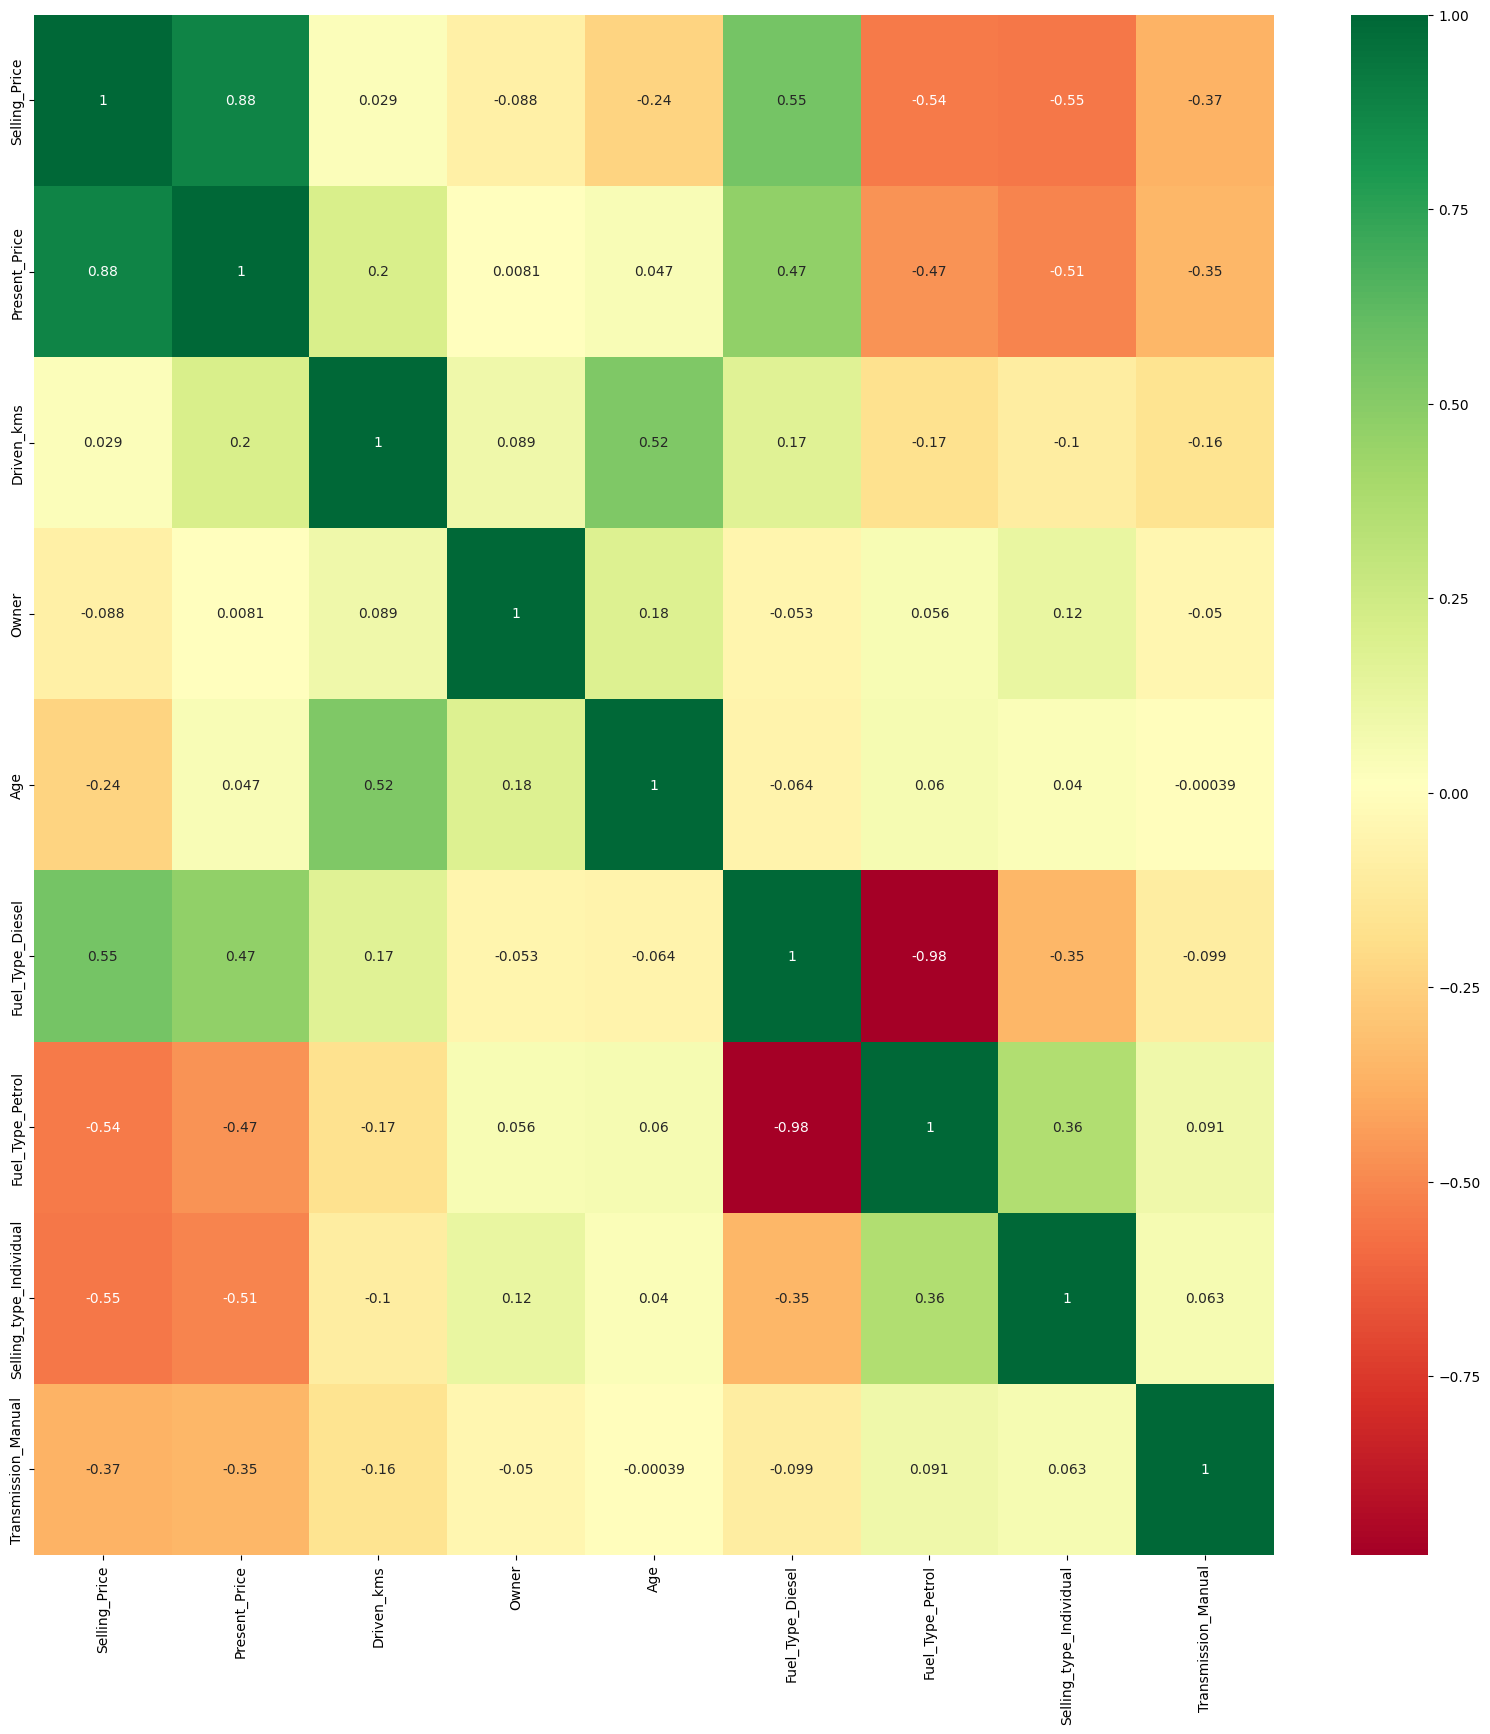

In [52]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(final_dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

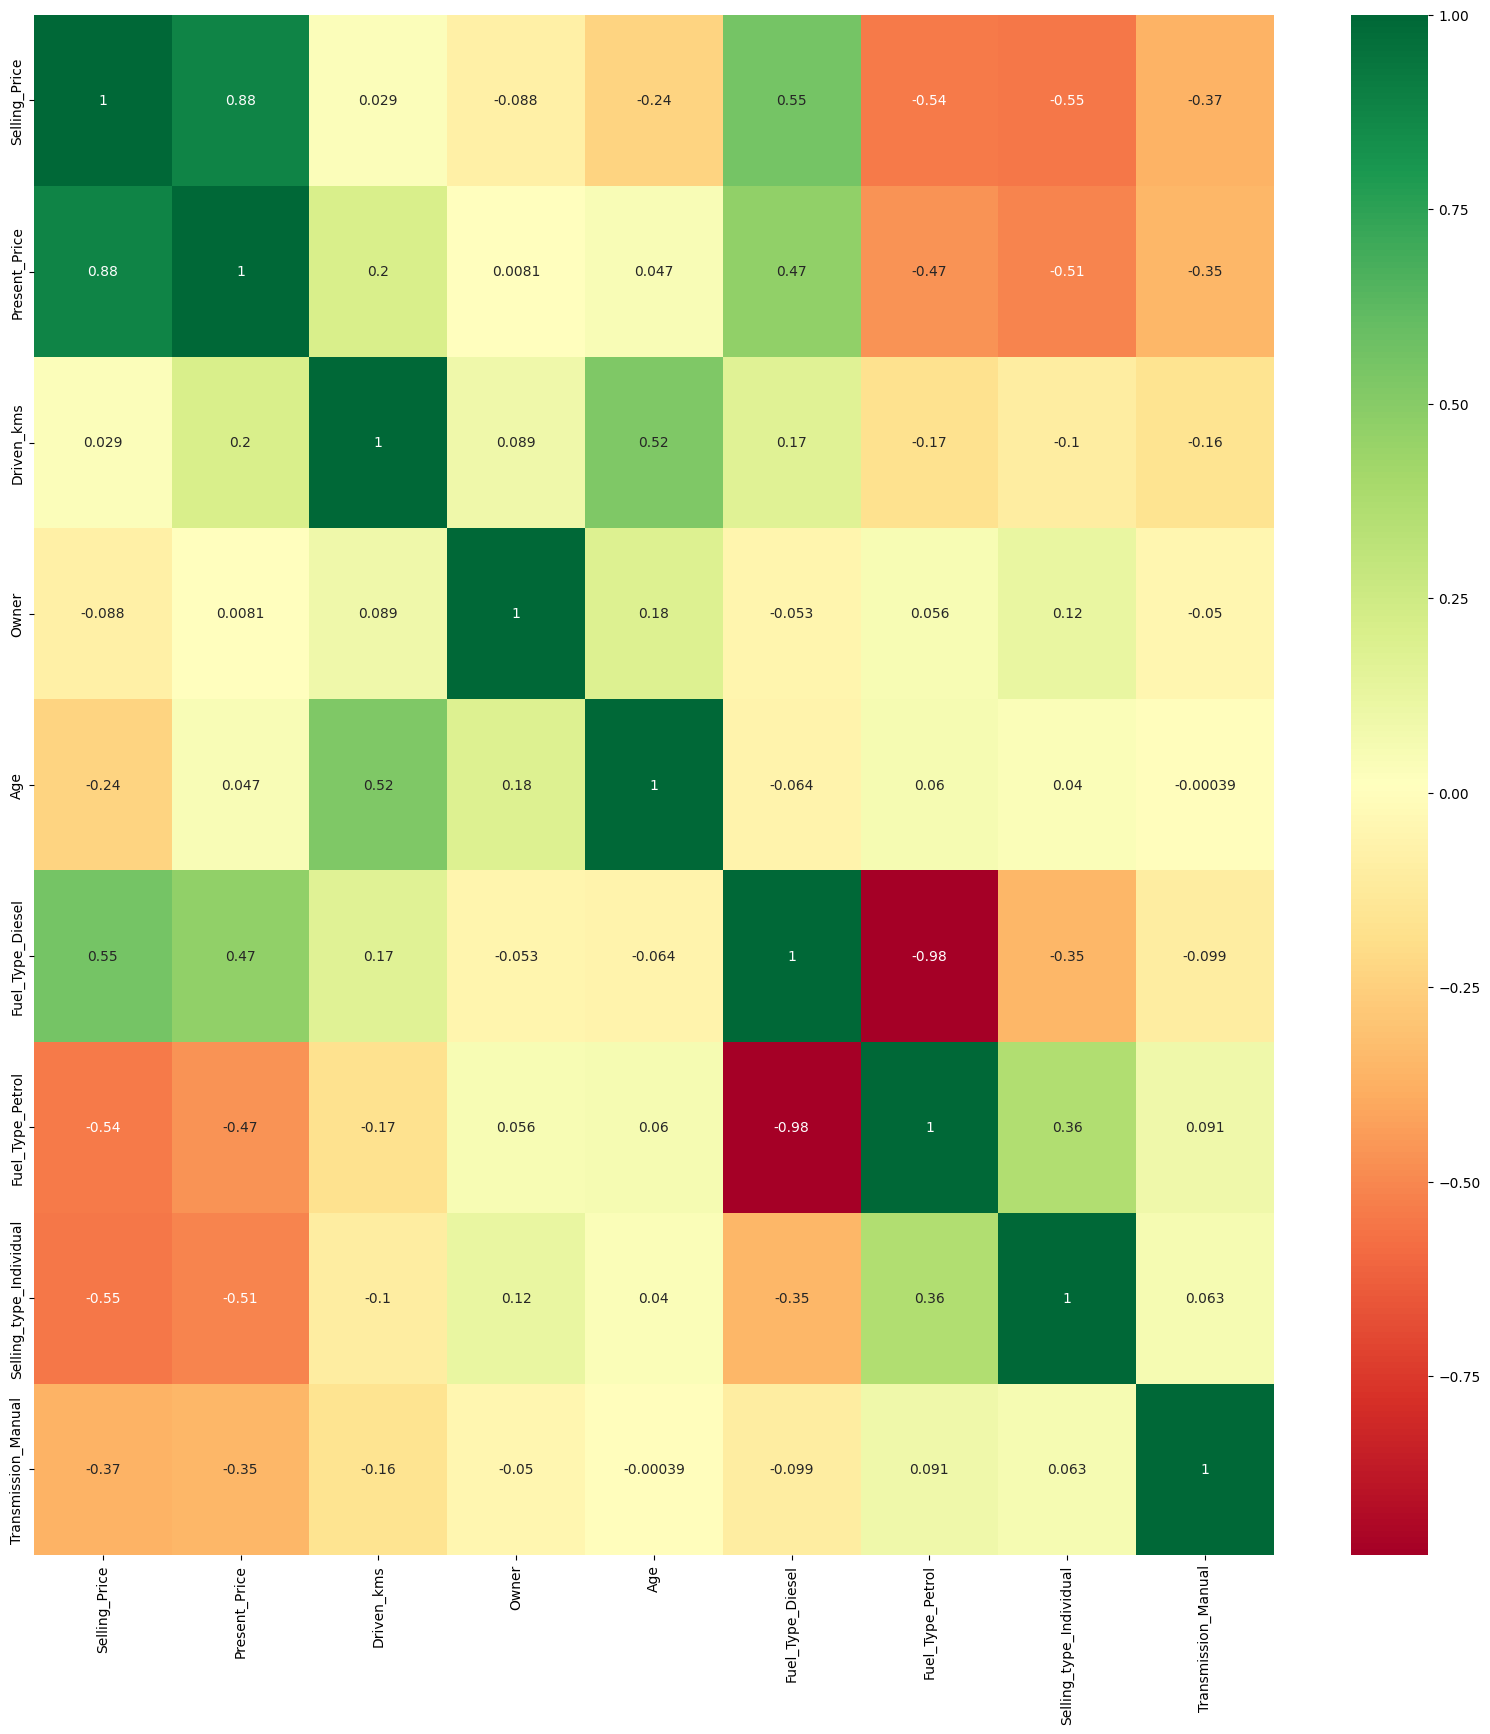

In [53]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_dataset.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map of the corerlation of the features
g=sns.heatmap(final_dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

In [54]:
final_dataset

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,False,True,False,True
1,4.75,9.54,43000,0,8,True,False,False,True
2,7.25,9.85,6900,0,4,False,True,False,True
3,2.85,4.15,5200,0,10,False,True,False,True
4,4.60,6.87,42450,0,7,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,True,False,False,True
297,4.00,5.90,60000,0,6,False,True,False,True
298,3.35,11.00,87934,0,12,False,True,False,True
299,11.50,12.50,9000,0,4,True,False,False,True


In [55]:
final_dataset.iloc[:,0]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [56]:
X= final_dataset.iloc[:,1:]
#slicing the dataset and reomoving the selling price for training the model
Y = final_dataset.iloc[:,0] 
#storing the selling price for checking..as this is the value to be predicted

In [57]:
final_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,False,True,False,True
1,4.75,9.54,43000,0,8,True,False,False,True
2,7.25,9.85,6900,0,4,False,True,False,True
3,2.85,4.15,5200,0,10,False,True,False,True
4,4.60,6.87,42450,0,7,True,False,False,True


In [58]:
X.head()

,Present_Price,Driven_kms,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5.59,27000,0,7,False,True,False,True
1,9.54,43000,0,8,True,False,False,True
2,9.85,6900,0,4,False,True,False,True
3,4.15,5200,0,10,False,True,False,True
4,6.87,42450,0,7,True,False,False,True


In [59]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
#in ensemble predictions of several base estimators are built in with a given learning algorithm.
#we used ExtraTreesRegressor
model = ExtraTreesRegressor()
#This class implements a meta estimator that fits a number of randomized decision trees 
#on various sub-samples of the dataset and uses averaging to improve the 
#predictive accuracy and control over-fitting.
model.fit(X,Y)

ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)

[0.37799379 0.03846997 0.00039355 0.07793925 0.22612586 0.0112376
 0.12813672 0.13970326]


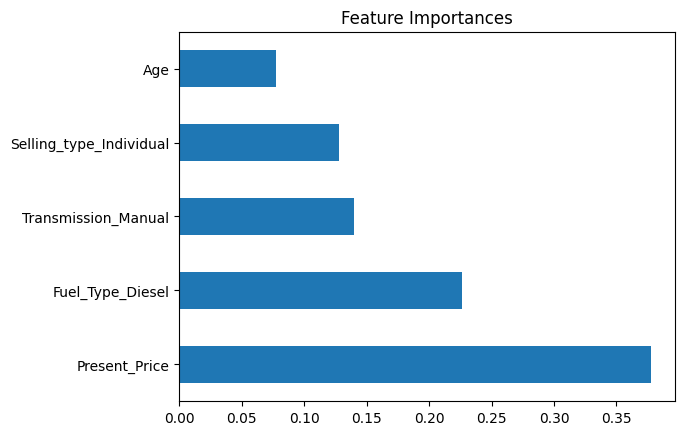

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split #class to divide the data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [64]:
X_train.shape

(240, 8)

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [66]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#n_estimators is a parameter of the random forest regressor which is used to control no of trees in the forest
#so we use 100 200 ....1200 trees for the model
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [67]:
max_features = ['auto', 'sqrt'] # we first consider all the featurees and 
#then sqare root number of features to train the model

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
max_depth

[5, 10, 15, 20, 25, 30]

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [75]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [76]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\CA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
87 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\CA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 638

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
predictions=rf_random.predict(X_test)

In [78]:
predictions1=rf_random.predict(X_train)

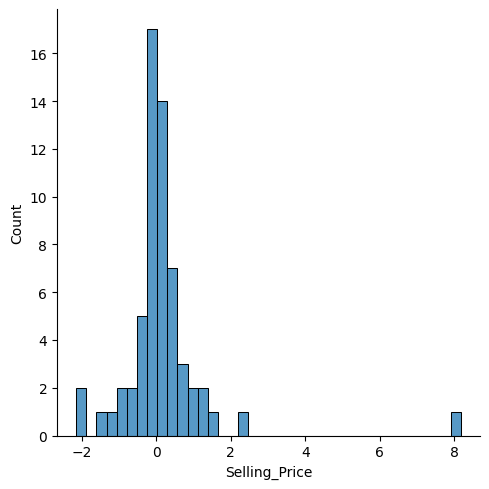

In [79]:
sns.displot(y_test-predictions)

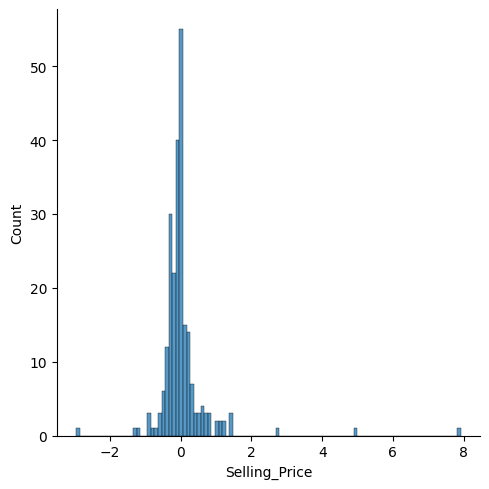

In [80]:
sns.displot(y_train-predictions1)

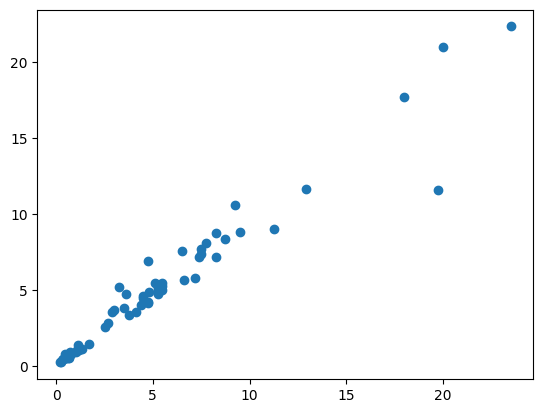

In [81]:
plt.scatter(y_test,predictions)

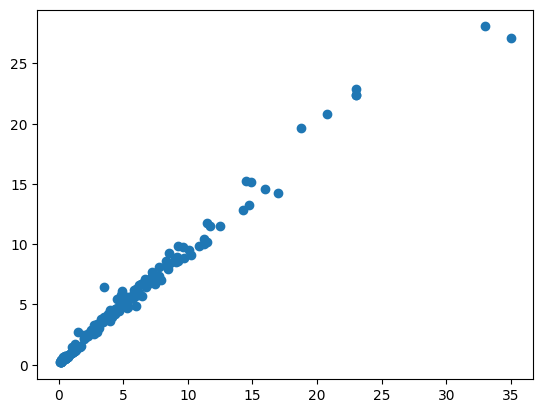

In [82]:
plt.scatter(y_train,predictions1)

In [83]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("RMSE : {:.2f}".format(rmse))

RMSE : 1.26


In [85]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.9370000547466346


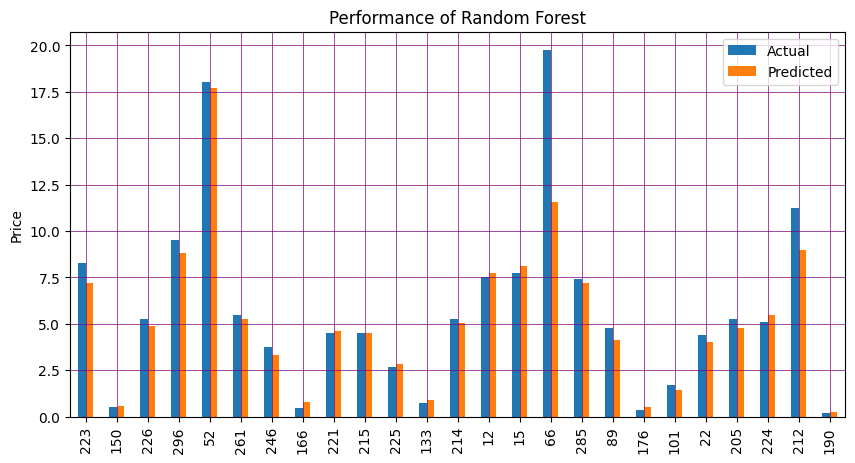

In [86]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='purple')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_predict = round(mean_squared_error(y_test,predictions),4)
mae_predict = round(mean_absolute_error(y_test,predictions),4)
print ('MSE is:'+str(mse_predict))
print ('MAE is:'+str(mae_predict))

MSE is:1.5925
MAE is:0.5995


In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
cutoff = 1.8                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)
y_test_classes = np.zeros_like(predictions)     # initialise a matrix full with zeros
y_pred_classes[abs(y_test - predictions) > cutoff] = 1 

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

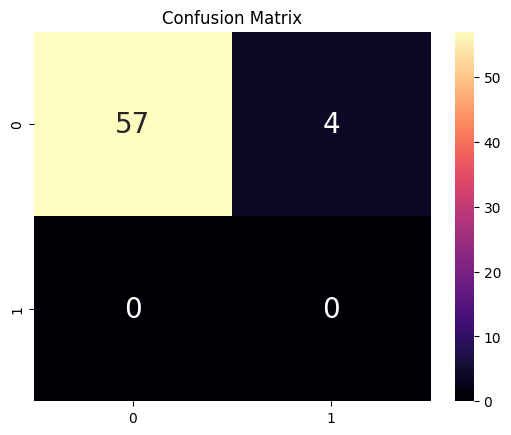

In [99]:
df_cm = cm
sns.heatmap(df_cm,annot=True,cmap="magma" ,annot_kws={"size": 20})
plt.title('Confusion Matrix')

In [100]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test_classes, y_pred_classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        61
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93        61
   macro avg       0.50      0.47      0.48        61
weighted avg       1.00      0.93      0.97        61



In [101]:
from sklearn.metrics import accuracy_score
s = accuracy_score(y_test_classes,y_pred_classes)
print("accuracy of the model : {}" . format(s))

accuracy of the model : 0.9344262295081968
